/Users/siddarthrathinam/anaconda3/envs/envs456/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/siddarthrathinam/anaconda3/envs/envs456/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


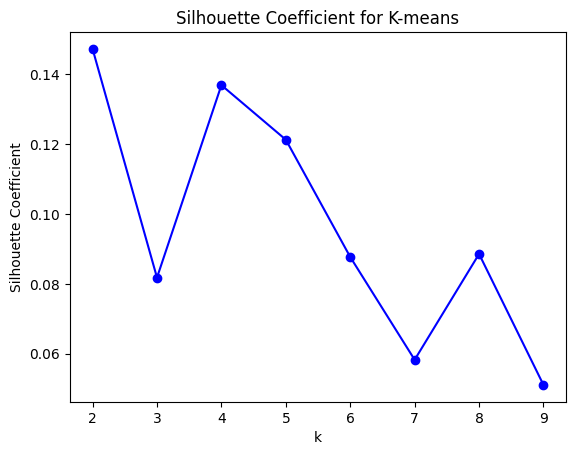

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Read the CSV file
df = pd.read_csv("dataset", header=None)

# Process the data
data = []
for index, row in df.iterrows():
    parts = row[0].strip().split(" ")
    numeric_parts = []
    for part in parts:
        try:
            numeric_part = float(part)
            numeric_parts.append(numeric_part)
        except ValueError:
            continue  # Skip non-numeric values
    data.append(numeric_parts)


X = np.array(data)

# Clustering functions
def Euclidean(x, y):
    # Compute the Euclidean distance between x and y
    return np.linalg.norm(x - y)

def kmeans(X, k, max_iters=100):
    centroids = X[random.sample(range(X.shape[0]), k)]
    for i in range(max_iters):
        distances = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels

def silhouette_score(X, labels):
    n = len(X)

    unique_labels = np.unique(labels)
    centroids = [X[labels == i].mean(axis=0) for i in unique_labels]

    return np.mean(silhouetteCoefficient(X, centroids))

def silhouetteCoefficient(data, centroids):
    n = len(data)
    distances = np.zeros((n, len(centroids)))

    for i, point in enumerate(data):
        for j, center in enumerate(centroids):
            distances[i, j] = Euclidean(point, center)

    cluster_assignments = np.argmin(distances, axis=1)
    silhouette = []

    for i in range(n):
        cluster = cluster_assignments[i]
        other_clusters = set(range(len(centroids))) - {cluster}
        same_cluster_points = [j for j in range(n) if cluster_assignments[j] == cluster and i != j]
        if len(same_cluster_points) == 0:
            continue
        avg_same_cluster = np.mean([Euclidean(data[i], data[j]) for j in same_cluster_points])
        avg_other_clusters = [np.mean([Euclidean(data[i], data[j]) for j in range(n) if cluster_assignments[j] == other_cluster]) for other_cluster in other_clusters if len(X[labels == other_cluster]) > 0]
        if not avg_other_clusters:
            continue
        min_avg_other_clusters = np.min(avg_other_clusters)
        silhouette.append((min_avg_other_clusters - avg_same_cluster) / max(avg_same_cluster, min_avg_other_clusters))

    return np.mean(silhouette)

# Compute silhouette scores for different k values
silhouette_scores = []
for k in range(1, 10):
    labels = kmeans(X, k)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(1, 10), silhouette_scores, '-bo')
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for K-means')
plt.show()
